In [0]:
%%bash
apt-get install libgeos-3* libgeos-dev
pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-3.6.2 set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (898 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing t

In [0]:
%matplotlib inline
%pylab inline
from mpl_toolkits.basemap import Basemap
import sklearn
import pandas as pd
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(10,10) # graph size

Populating the interactive namespace from numpy and matplotlib


In [0]:
# function to plot images  
def plot_im(lon,lat,im,size_points,var_name):
    
    # transform to arrays (just in case)
    lon=array(lon)
    lat=array(lat)
    im=array(im)
    
    if max(lon)-min(lon)<100:
      # Mercator projection (for small zone)
      m=Basemap(projection='merc',llcrnrlat=17,urcrnrlat=31,\
                llcrnrlon=260,urcrnrlon=280,lat_0=(31+17)*0.5,\
                lon_0=(280+260)*0.5,resolution='l')
      #m=Basemap(projection='merc',llcrnrlat=nanmin(lat),urcrnrlat=nanmax(lat),\
      #          llcrnrlon=nanmin(lon),urcrnrlon=nanmax(lon),lat_0=(nanmax(lat)+nanmin(lat))*0.5,\
      #          lon_0=(nanmax(lon)+nanmin(lon))*0.5,resolution='l')
    else:
      # Orthogonal projection (for large zone)
      m=Basemap(projection='/drive/1I8taMfyswpZhjYAPRuk2Ty1yPgQO3fmG#scrollTo=5-5A9W88qRb8ortho',lat_0=0,lon_0=0,resolution='l')
    # you can use other projections (see https://matplotlib.org/basemap/users/mapsetup.html)
    
    # transform (lon,lat) to (x,y)
    x,y=m(lon,lat)

    # plot
    im=ma.masked_where(isnan(im),im)
    res=m.scatter(x,y,size_points,im,'o',alpha=1,cmap='jet',lw=0)
    m.drawcoastlines()
    m.fillcontinents()
    parallels = linspace(nanmin(lat),nanmax(lat),15)
    meridians = linspace(nanmin(lon),nanmax(lon),15)
    #m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
    #m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
    cb=m.colorbar(res,location="right")
    cb.set_label(var_name,fontsize=15)
    
# function to plot time series
def plot_ts(time,ts,line_type,var_name):

    # plot
    plot_date(time,ts,line_type)
    xlabel('Time',fontsize=15)
    ylabel(var_name,fontsize=15)

In [0]:
from google.colab import auth
auth.authenticate_user()

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?code_challenge=B_L3f5FQJDnWLjap-7eLoFw7JBrp_uj6_juSclraJT8&prompt=select_account&code_challenge_method=S256&access_type=offline&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&client_id=32555940559.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive

Enter verification code: ··········


AuthorizationError: ignored

# I. Extraction des données

In [0]:
%%bigquery --project alert-ground-261008 DataHurricanes
SELECT * 
FROM bdo2020.bdo2020.1998_2015
WHERE lon>260 AND lon<280 AND lat>17 AND lat<31

In [0]:
from google.colab import drive
drive.mount('/content/drive')
#DataHurricanes.to_csv('/content/drive/My Drive/dataHurricanes.csv')
DataHurricanes = pd.read_csv('/content/drive/My Drive/dataHurricanes.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
DataHurricanes['day']= DataHurricanes.time.apply(lambda x: datetime.date.fromordinal(int(x)).day)
DataHurricanes['month']= DataHurricanes.time.apply(lambda x: datetime.date.fromordinal(int(x)).month)
DataHurricanes['year']= DataHurricanes.time.apply(lambda x: datetime.date.fromordinal(int(x)).year)
DataHurricanes

,Unnamed: 0,lat,lon,sst,time,ssh,day,month,year
0,0,19.125,265.875,22.20,733837.0,0.2465,6,3,2010
1,1,19.125,266.625,22.35,733837.0,0.2867,6,3,2010
2,2,19.375,266.875,22.50,733837.0,0.2659,6,3,2010
3,3,19.625,266.875,22.35,733837.0,0.2463,6,3,2010
4,4,19.875,264.375,22.65,733837.0,0.2029,6,3,2010
...,...,...,...,...,...,...,...,...,...
14035485,14035485,27.375,271.125,24.30,730947.0,0.4609,7,4,2002
14035486,14035486,26.625,269.375,23.55,730947.0,0.1133,7,4,2002
14035487,14035487,27.625,271.625,23.55,730947.0,0.1894,7,4,2002
14035488,14035488,27.625,275.125,23.55,730947.0,0.2084,7,4,2002


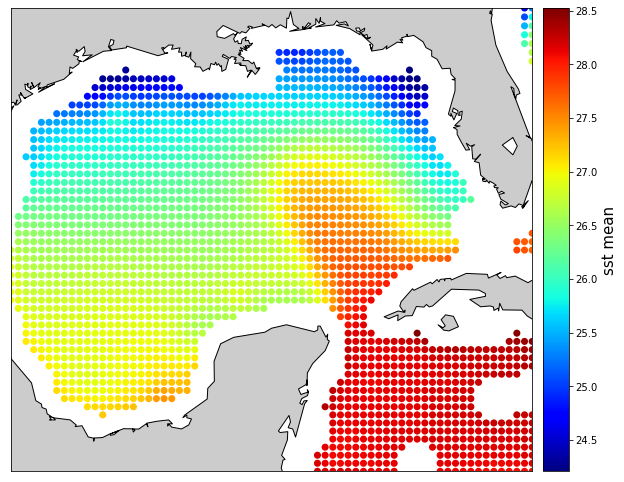

In [0]:
test = DataHurricanes.groupby(['lon','lat'])['sst'].mean()
lon = DataHurricanes.groupby(['lon','lat'])['lon'].mean()
lat = DataHurricanes.groupby(['lon','lat'])['lat'].mean()
plot_im(lon,lat,test,50,'sst mean')

# II. Caractéristiques globales
## Moyenne spatiale en fonction du temps

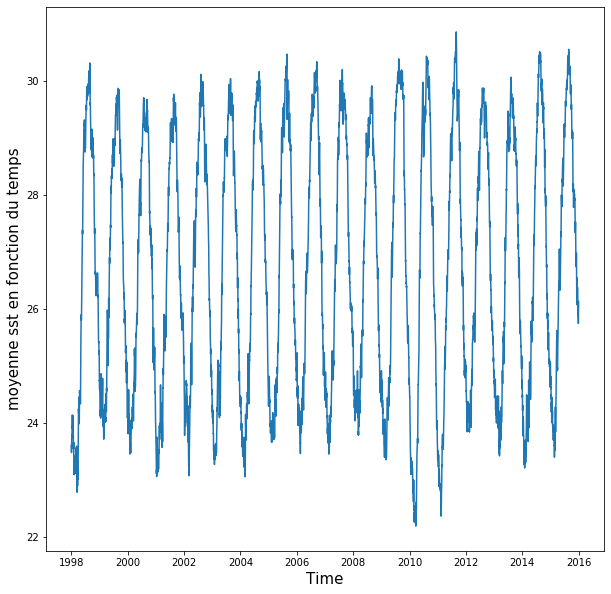

In [0]:
sst_avg = DataHurricanes.groupby(['time']).mean()
plot_ts(sst_avg.index,sst_avg.sst,'-','moyenne sst en fonction du temps')

## Variance spatiale en fonction du temps

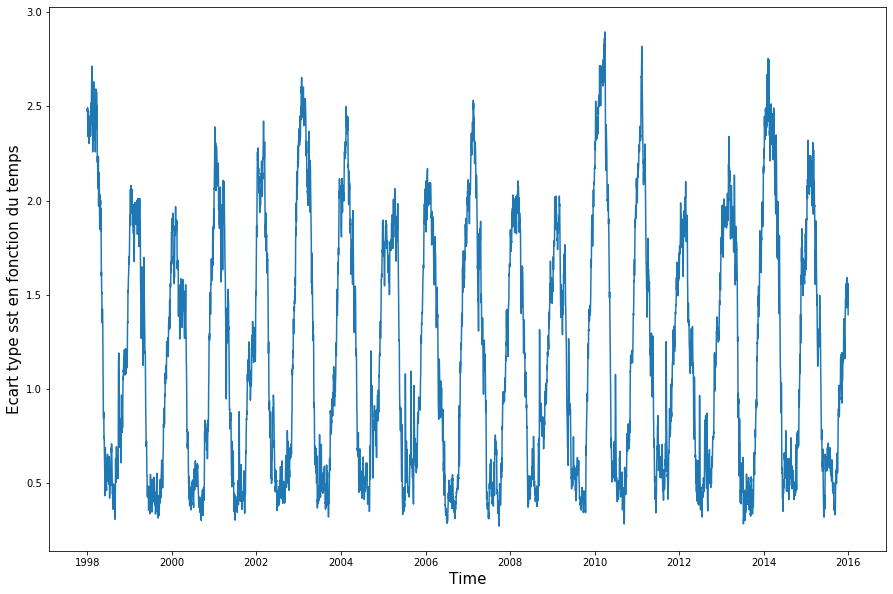

In [0]:
sst_std = sst_avg.copy()
std = DataHurricanes.groupby(['time']).std()
sst_std['variance'] = std['sst']
#sst_std = sst_std.drop('sst',1)
#sst_std = sst_std.drop('ssh',1)
figure(figsize = (15,10))
plot_ts(sst_std.index,sst_std.variance,'-','Ecart type sst en fonction du temps')

## Anomalies: moyenne jour n+1 - moyenne jour n

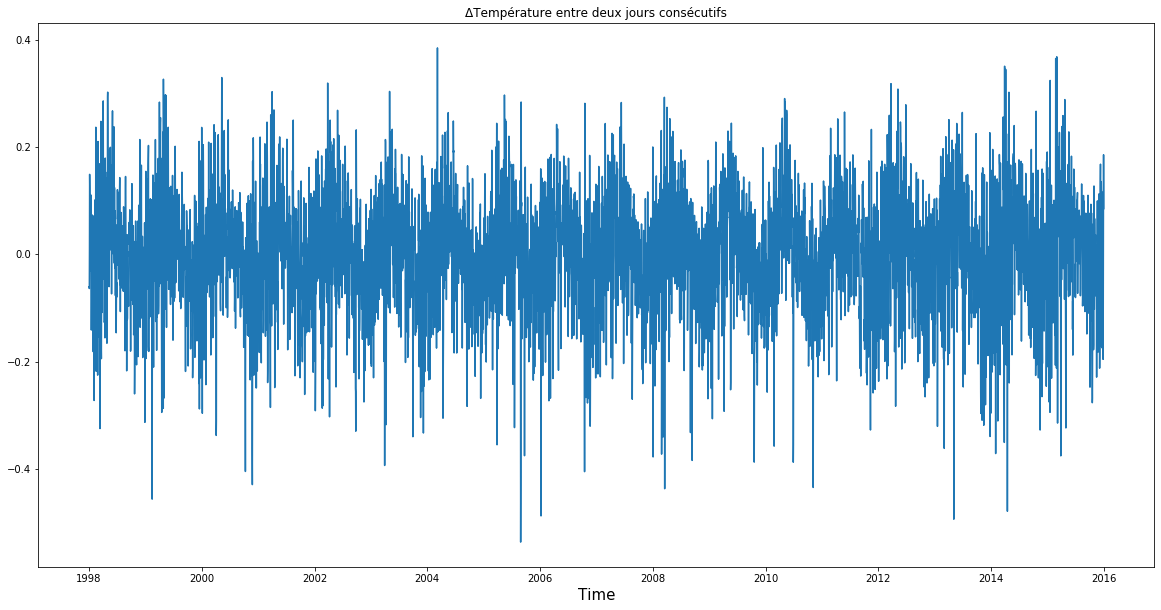

In [0]:
sst_avg_before = sst_avg.drop(sst_avg.index[[0]])
sst_avg_after = sst_avg.drop(sst_avg.index[-1])

sst_anomalies_avg = sst_avg_before.sst.values - sst_avg_after.sst.values
time = sst_avg_before.index.values

sst_anomalies_avg = pd.DataFrame(sst_anomalies_avg,time)
sst_anomalies_avg.columns = ['anomalies_avg']

figure(figsize = (20,10))
plt.title("ΔTempérature entre deux jours consécutifs")
plot_ts(sst_anomalies_avg.index,sst_anomalies_avg.anomalies_avg,'-','')

## Anomalies: variance jour n+1 - variance jour n

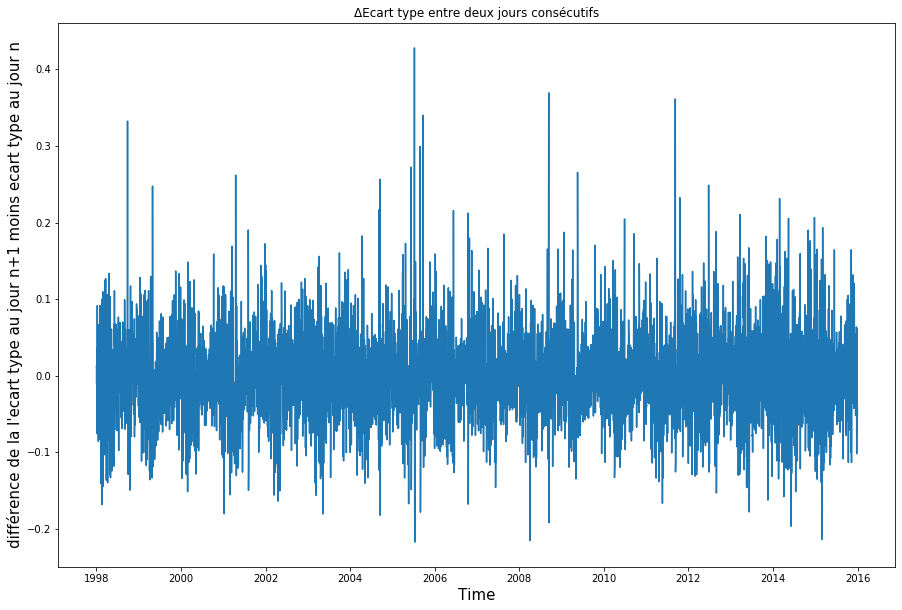

In [0]:
sst_std_before = sst_std.drop(sst_std.index[[0]])
sst_std_after = sst_std.drop(sst_std.index[-1])

sst_anomalies_std = sst_std_before.variance.values - sst_std_after.variance.values  
time = sst_std_before.index.values
day = sst_std_before.day.values
month = sst_std_before.month.values
year = sst_std_before.year.values

sst_anomalies_std = pd.DataFrame({'time': time, 'anomalies_std':sst_anomalies_std,'day' : day, 'month':month,'year': year, 'time': time})
figure(figsize = (15,10))
plt.title("ΔEcart type entre deux jours consécutifs")
plot_ts(sst_anomalies_std.time,sst_anomalies_std.anomalies_std,'-',"différence de la l'ecart type au jour n+1 moins ecart type au jour n")

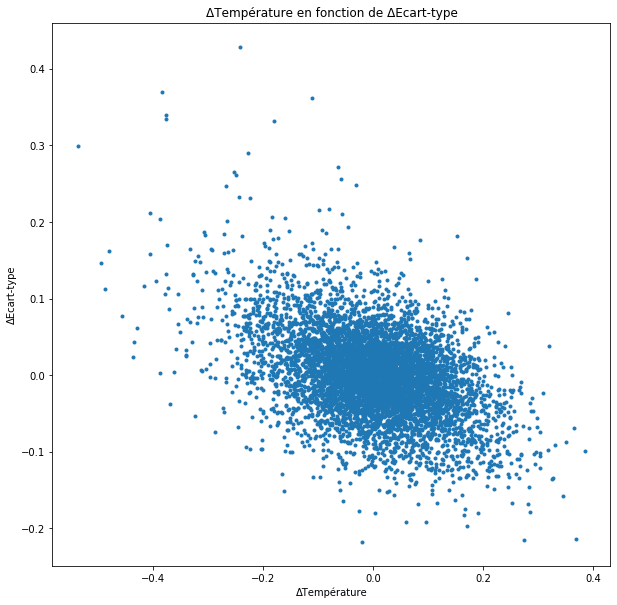

In [0]:
plt.title("ΔTempérature en fonction de ΔEcart-type")
xlabel("ΔTempérature")
ylabel("ΔEcart-type")
plot(sst_anomalies_avg.anomalies_avg,sst_anomalies_std.anomalies_std,'.')

$\Delta$


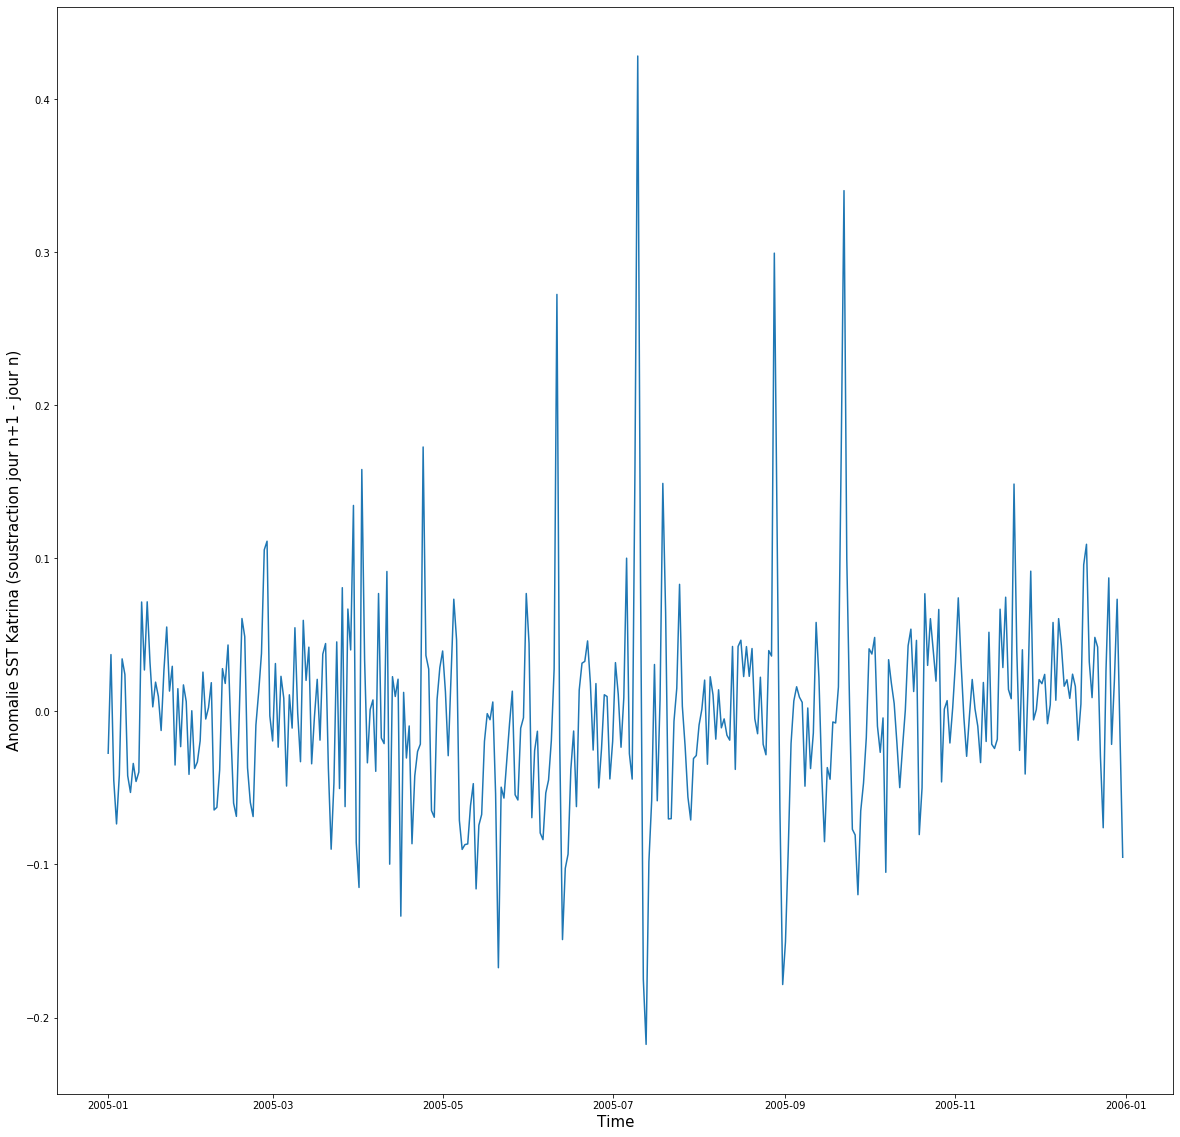

In [0]:
sst_katrina = sst_anomalies_std.loc[sst_anomalies_std['year'] == 2005]
plot_ts(sst_katrina.time,sst_katrina.anomalies_std,'-','Anomalie SST Katrina (soustraction jour n+1 - jour n)')

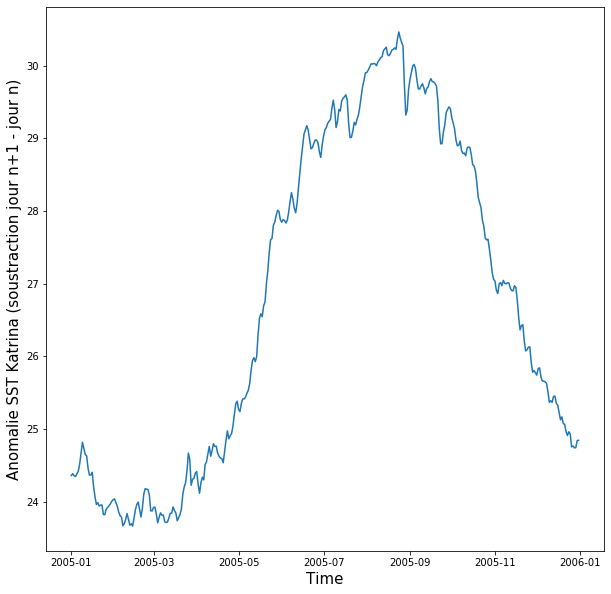

In [0]:
sst_katrina = sst_avg.loc[(sst_avg['year'] == 2005)]
plot_ts(sst_katrina.index,sst_katrina.sst,'-','Anomalie SST Katrina (soustraction jour n+1 - jour n)')

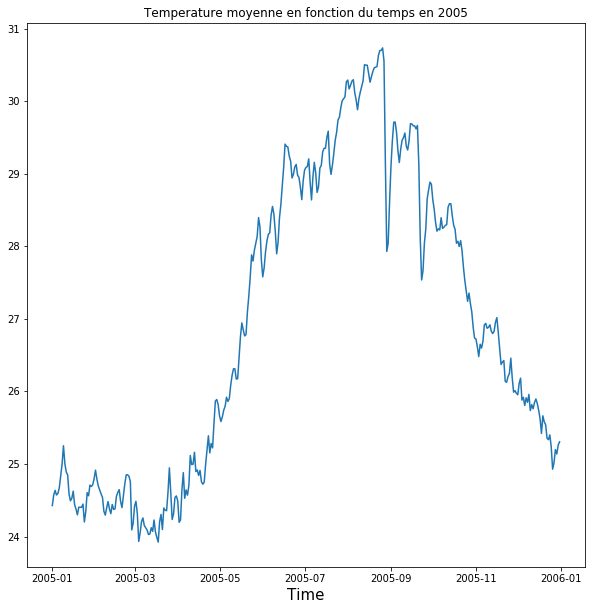

In [0]:
zoom = DataHurricanes.loc[(DataHurricanes['year'] == 2005) & (DataHurricanes['lat']<28) & (DataHurricanes['lat']>24) & (DataHurricanes['lon']<274) & (DataHurricanes['lon']>270) ].groupby('time').mean()
title("Temperature moyenne en fonction du temps en 2005")
#text(0,0,"Katrina")
plot_ts(zoom.index,zoom.sst,'-','')



In [0]:
sst_avg

,lat,lon,sst,ssh,day,month,year
time,,,,,,,
729390.0,23.765749,270.96856,23.604941,0.352459,1,1,1998
729391.0,23.765749,270.96856,23.544731,0.352215,2,1,1998
729392.0,23.765749,270.96856,23.481218,0.351905,3,1,1998
729393.0,23.765749,270.96856,23.490070,0.351794,4,1,1998
729394.0,23.765749,270.96856,23.639578,0.351289,5,1,1998
...,...,...,...,...,...,...,...
735959.0,23.765749,270.96856,25.843068,0.495540,27,12,2015
735960.0,23.765749,270.96856,25.744848,0.494586,28,12,2015
735961.0,23.765749,270.96856,25.857892,0.493586,29,12,2015


## Detection du nombre de Hurricanes

In [0]:
number_hurricanes = sst_anomalies_std.loc[sst_anomalies_std['anomalies_std'] > 0.25]  #seuil empirique
number_hurricanes

,time,anomalies_std,day,month,year
268,729659.0,0.332555,27,9,1998
1202,730593.0,0.261912,18,4,2001
2449,731840.0,0.256442,16,9,2004
2717,732108.0,0.272384,11,6,2005
2746,732137.0,0.428113,10,7,2005
2795,732186.0,0.299353,28,8,2005
2820,732211.0,0.340171,22,9,2005
3905,733296.0,0.335044,11,9,2008
3906,733297.0,0.369353,12,9,2008
4155,733546.0,0.265522,19,5,2009


# II. PCA

In [0]:
#pca_data = DataHurricanes.loc[(DataHurricanes['lat'] < 28) & (DataHurricanes['lat'] > 23) & (DataHurricanes['lon'] < 275) &(DataHurricanes['lon'] > 266)]
pca_data = DataHurricanes.loc[(DataHurricanes['year'] == 1998)]
pca_data = pca_data.sort_values(['time'])
pca_data = pca_data.sst.values
pca_data = pca_data.reshape((365,2135))   # 2135 : nombre de pixels a l instant t      6574 : nombre d image differentes            

In [0]:
len(pd.unique(DataHurricanes.loc[(DataHurricanes['year'] == 1998)].time.values))

365

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(pca_data)
new_pca_data = pca.transform(pca_data)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

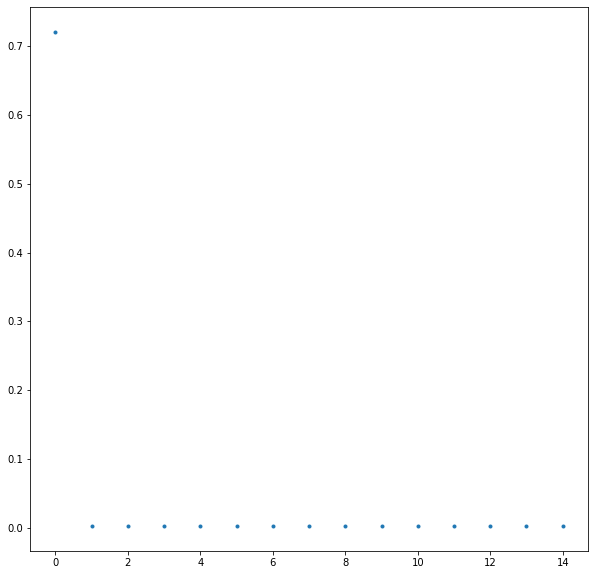

In [0]:
plot(pca.explained_variance_ratio_,'.')

In [0]:
shape(pca.components_)

(15, 2135)

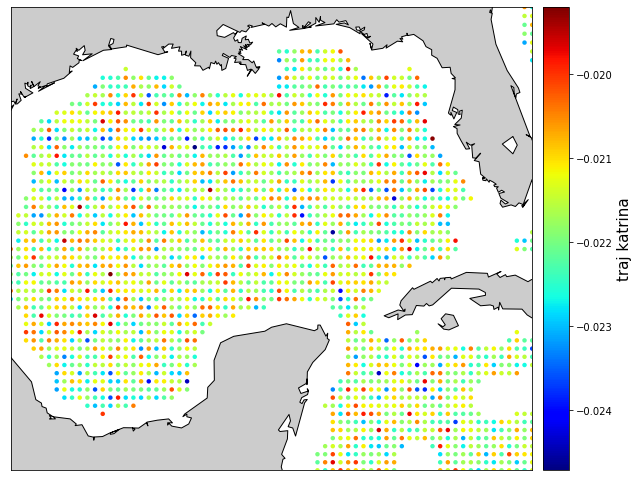

In [0]:
plot_im(DataHurricanes.loc[(DataHurricanes['time'] == 733837.0)].lon,DataHurricanes.loc[(DataHurricanes['time'] == 733837.0)].lat,pca.components_[0,:],20,'traj katrina')

In [0]:
new_pca_data[1]
pca.components_[0].shape

(720,)

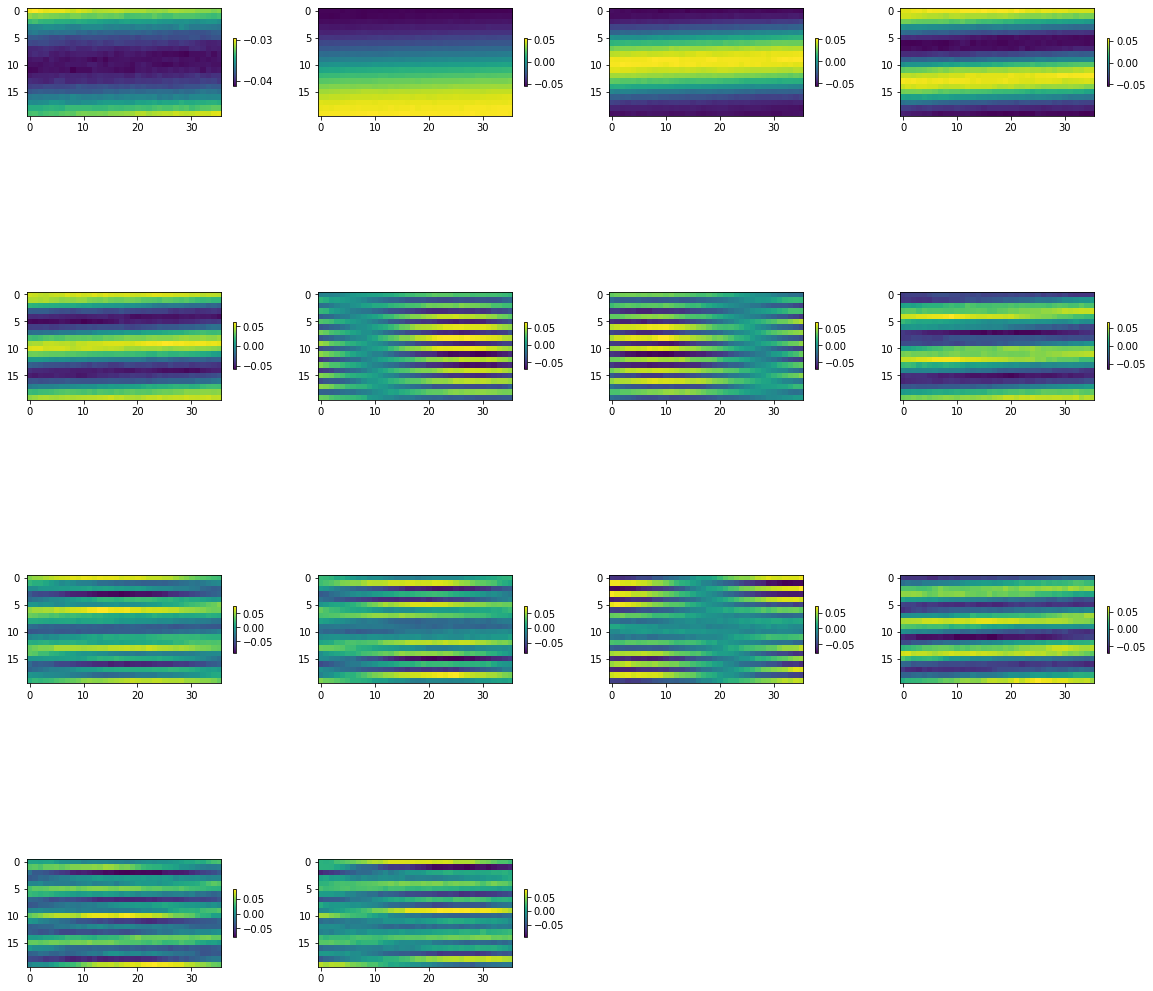

In [0]:
plt.figure()
for i in range(0,14):
  img = pca.components_[i]
  img = img.reshape((20,36))
  plt.subplot(4,4,i+1)
  imshow(img)
  colorbar(shrink = 0.2)

In [0]:
dataKatrina = DataHurricanes.loc[(DataHurricanes['year'] == 2005) & (DataHurricanes['month'] == 8) & (DataHurricanes['day'] > 17) & (DataHurricanes['day'] <= 30) ]
dataKatrina = dataKatrina.sort_values(['time','lon','lat'])

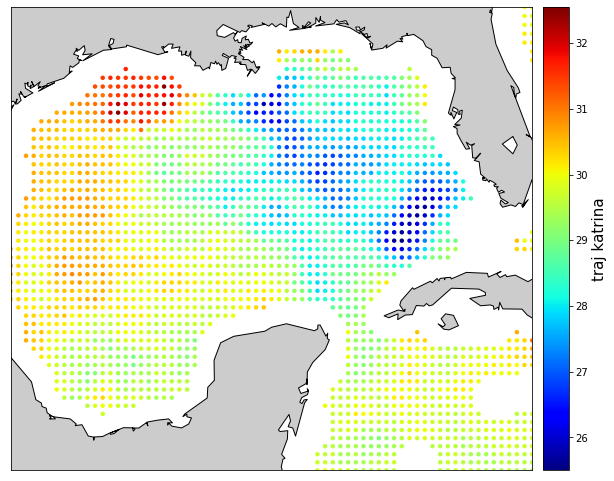

In [0]:
dataTempKatrina = dataKatrina.loc[(dataKatrina['day'] == 29)] 
plot_im(dataTempKatrina.lon,dataTempKatrina.lat,dataTempKatrina.sst,20,'traj katrina')


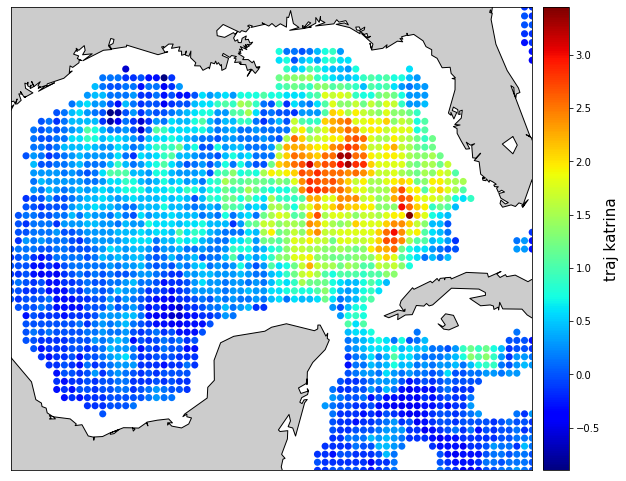

In [0]:
day = 27
Delta = dataKatrina.loc[(dataKatrina['day'] == day )].sst.values - dataKatrina.loc[(dataKatrina['day'] == day + 1)].sst.values
plot_im(dataKatrina.loc[(dataKatrina['day'] == day )].lon,dataKatrina.loc[(dataKatrina['day'] == day )].lat, Delta,50,'traj katrina')

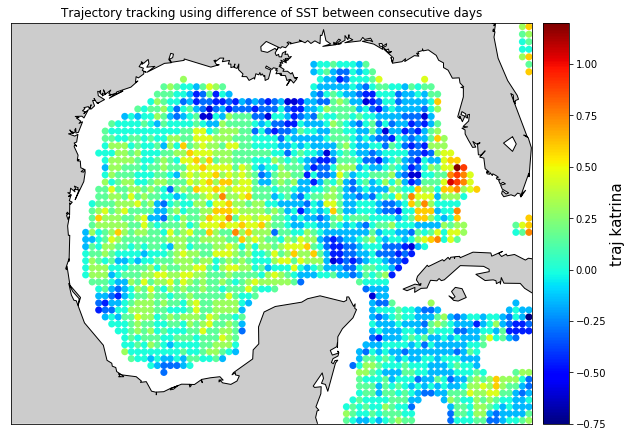

1959


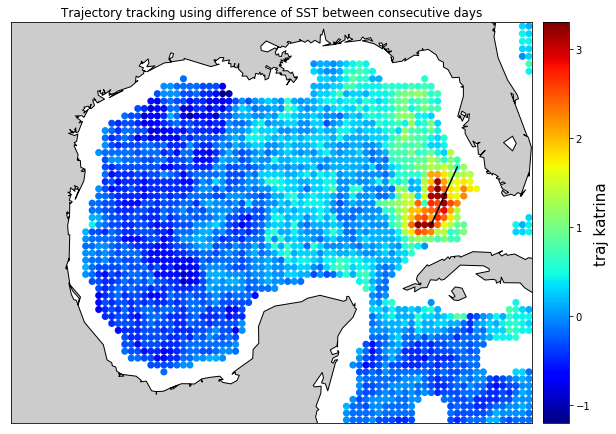

1823


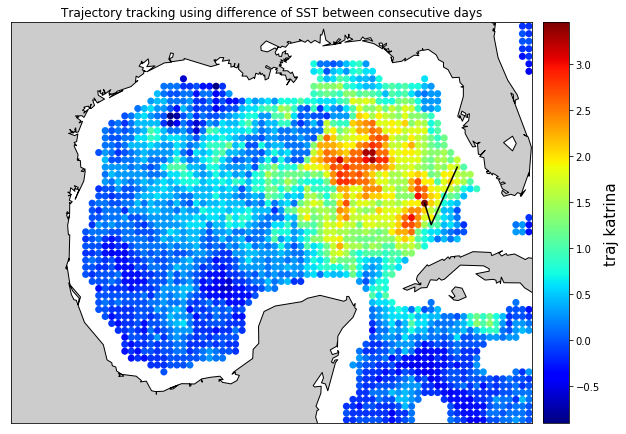

1789


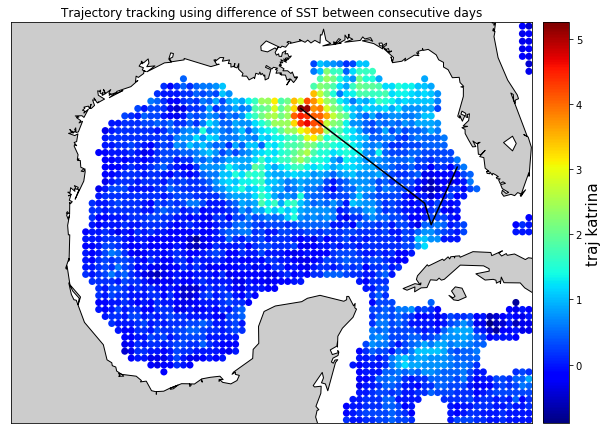

1085


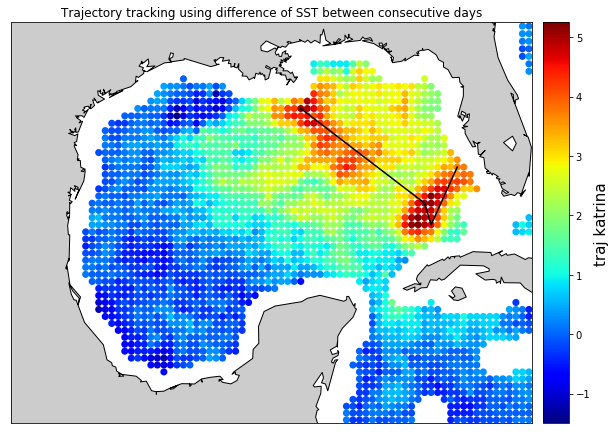

In [0]:
LON = []
LAT = []
diff = np.zeros(2135)
deltaSum = np.array(np.zeros(2135))
for i in range(4):
  Delta = dataKatrina.loc[(dataKatrina['day'] == 26 + i -1)].sst.values - dataKatrina.loc[(dataKatrina['day'] == 26 + i)].sst.values
  plot_im(dataKatrina.loc[(dataKatrina['day'] == day )].lon,dataKatrina.loc[(dataKatrina['day'] == day )].lat,Delta,50,'traj katrina')

  deltaSum += Delta
  index = np.argmax(Delta)
  LON.append(dataKatrina.loc[(dataKatrina['day'] == 26 )].lon.values[index])
  LAT.append(dataKatrina.loc[(dataKatrina['day'] == 26 )].lat.values[index])
  lon=array(LON)
  lat=array(LAT)
  x,y=m(lon,lat)
  title('Trajectory tracking using difference of SST between consecutive days')
  plot(x,y,'black','*')
  plt.show()

  print(index)
  diff[index] = 1
plot_im(dataKatrina.loc[(dataKatrina['day'] == day )].lon,dataKatrina.loc[(dataKatrina['day'] == day )].lat,deltaSum,50,'traj katrina')



m=Basemap(projection='merc',llcrnrlat=17,urcrnrlat=31,\
                llcrnrlon=260,urcrnrlon=280,lat_0=(31+17)*0.5,\
                lon_0=(280+260)*0.5,resolution='l')
lon=array(LON)
lat=array(LAT)
x,y=m(lon,lat)
title('Trajectory tracking using difference of SST between consecutive days')
plot(x,y,'black')


In [0]:
import imageio
images = []
filenames = ['/content/drive/My Drive/BIGDATACLOUDCOMPUTING/K1.png','/content/drive/My Drive/BIGDATACLOUDCOMPUTING/K2.png','/content/drive/My Drive/BIGDATACLOUDCOMPUTING/K3.png','/content/drive/My Drive/BIGDATACLOUDCOMPUTING/K4.png']
for filename in filenames:
    images.append(imageio.imread(filename))
kargs = { 'duration': 1 }
imageio.mimsave('/content/drive/My Drive/BIGDATACLOUDCOMPUTING/movie.gif', images, **kargs)

1889
1125
1188
577


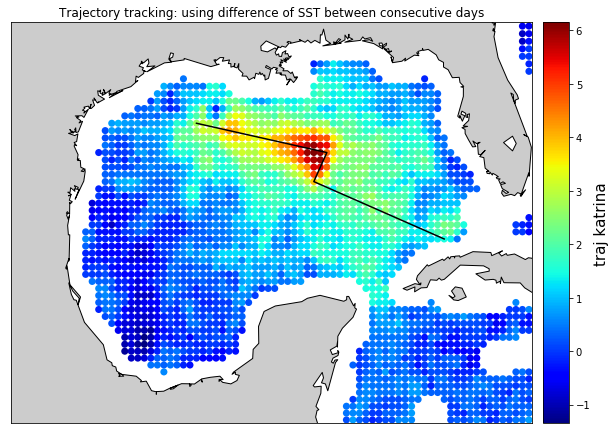

In [0]:
dataOuragan = DataHurricanes.loc[(DataHurricanes['year'] == 2008) & (DataHurricanes['month'] == 9) & (DataHurricanes['day'] > 7) & (DataHurricanes['day'] <= 15) ]
dataOuragan = dataOuragan.sort_values(['time','lon','lat'])

LON = []
LAT = []
diff = np.zeros(2135)
deltaSum = np.array(np.zeros(2135))
for i in range(4):
  Delta = dataOuragan.loc[(dataOuragan['day'] == 10 + i -1)].sst.values - dataOuragan.loc[(dataOuragan['day'] == 10 + i)].sst.values
  deltaSum += Delta
  index = np.argmax(Delta)
  LON.append(dataOuragan.loc[(dataOuragan['day'] == 10 )].lon.values[index])
  LAT.append(dataOuragan.loc[(dataOuragan['day'] == 10 )].lat.values[index])
  print(index)
  diff[index] = 1
plot_im(dataOuragan.loc[(dataOuragan['day'] == 10 )].lon,dataOuragan.loc[(dataOuragan['day'] == 10 )].lat,deltaSum,50,'traj katrina')



m=Basemap(projection='merc',llcrnrlat=17,urcrnrlat=31,\
                llcrnrlon=260,urcrnrlon=280,lat_0=(31+17)*0.5,\
                lon_0=(280+260)*0.5,resolution='l')
lon=array(LON)
lat=array(LAT)
x,y=m(lon,lat)
title('Trajectory tracking: using difference of SST between consecutive days')
plot(x,y,'black')